In [2]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from collections import defaultdict
from surprise.model_selection import train_test_split 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score

/Users/kanupriyaarora/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#reading files
df_ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])
df_movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

print(df_movies.head(5))
print(df_ratings.head(5))

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
   user_id  movie_id  rating
0        1      1193       5
1        1       661       3
2        1       914       3
3        1      3408       4
4        1      2355       5


In [4]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the dataset and define the Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_ratings[['user_id', 'movie_id', 'rating']], reader)


### Comparing performance of various collaborative filtering algorithms

In [5]:
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise import CoClustering
from surprise import SlopeOne
from surprise.model_selection import cross_validate


algo1 = SVD()
algo2 = KNNBasic()
algo3 = NMF()
algo4 = CoClustering()
algo5 = SlopeOne()

# Run 5-fold cross-validation and print results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


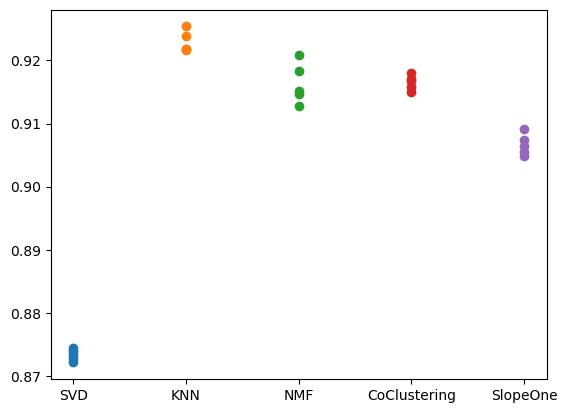

In [6]:

import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')
     

### Hyperparamter Tuning

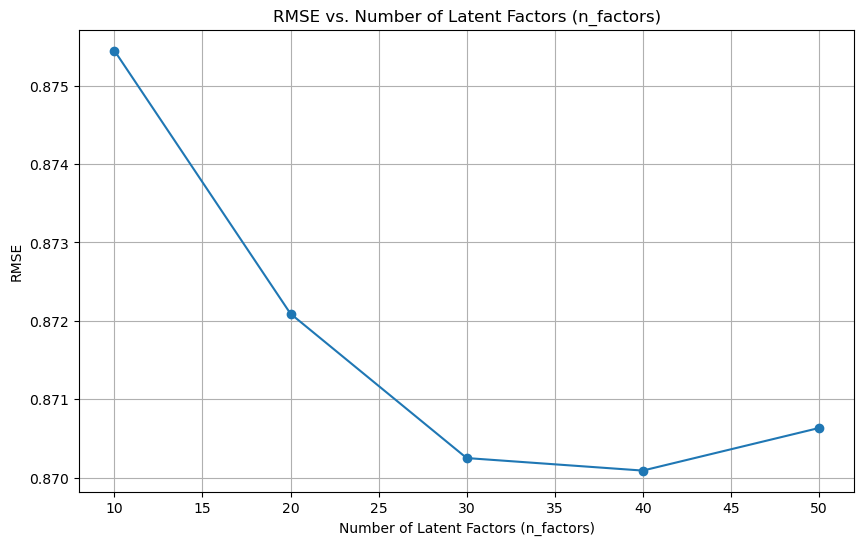

In [7]:
# Initialize lists to store RMSE and n_factors values
rmse_values = []
n_factors_list = [10, 20, 30, 40, 50]  # Change the number of latent factors as needed

# Perform cross-validation for each n_factors value
for n_factors in n_factors_list:
    svd_model = SVD(n_factors=n_factors)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())

# Plot RMSE vs. n_factors
plt.figure(figsize=(10, 6))
plt.plot(n_factors_list, rmse_values, marker='o')
plt.title('RMSE vs. Number of Latent Factors (n_factors)')
plt.xlabel('Number of Latent Factors (n_factors)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

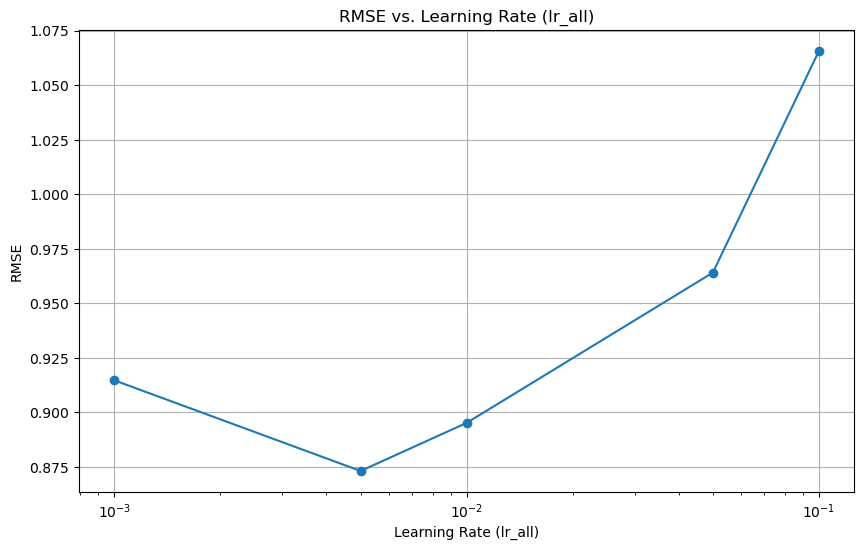

In [8]:
# Initialize lists to store RMSE and learning rate values
rmse_values = []
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]  # Change the learning rates as needed

# Perform cross-validation for each learning rate
for lr_all in learning_rates:
    svd_model = SVD(lr_all=lr_all)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())

# Plot RMSE vs. learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, rmse_values, marker='o')
plt.title('RMSE vs. Learning Rate (lr_all)')
plt.xlabel('Learning Rate (lr_all)')
plt.ylabel('RMSE')
plt.xscale('log')  # Use a logarithmic scale for the learning rate
plt.grid(True)
plt.show()





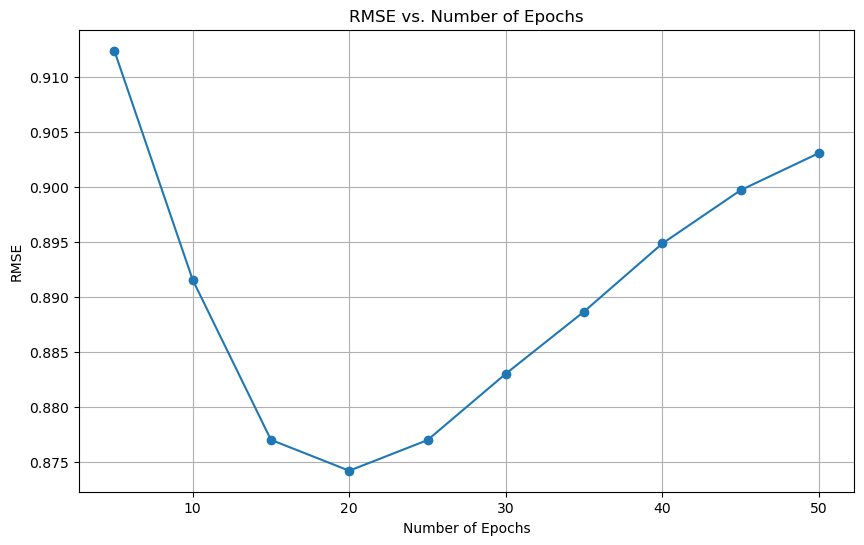

In [ ]:
# Initialize lists to store RMSE and epochs
rmse_values = []
epochs = [5, 10, 15, 20, 25, 30,35,40,45,50]  # Change the number of epochs as needed

# Perform cross-validation for each epoch value
for n_epochs in epochs:
    svd_model = SVD(n_epochs=n_epochs)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())

# Plot RMSE vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, rmse_values, marker='o')
plt.title('RMSE vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

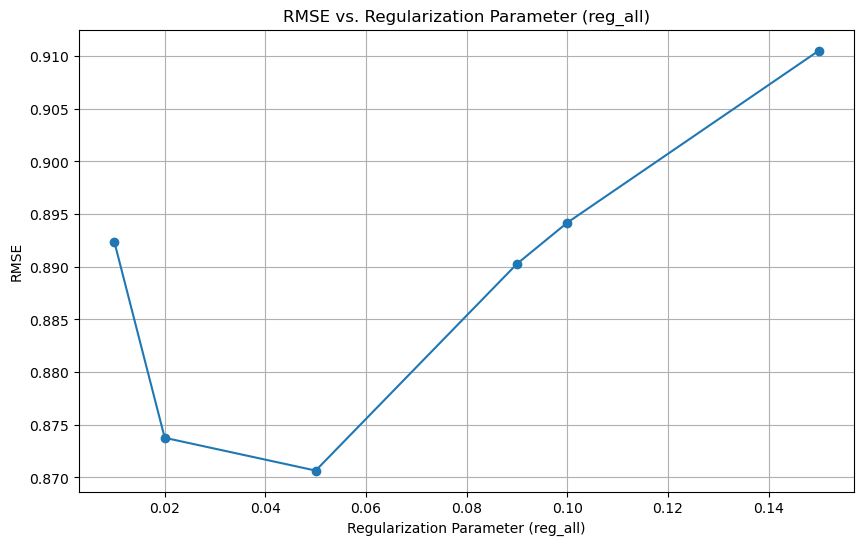

In [ ]:
# Initialize lists to store RMSE and regularization parameter values
rmse_values = []
reg_all_values = [0.01, 0.02, 0.05, 0.09, 0.1,0.15]  # Change the regularization parameters as needed

# Perform cross-validation for each regularization parameter
for reg_all in reg_all_values:
    svd_model = SVD(reg_all=reg_all)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())

# Plot RMSE vs. regularization parameter
plt.figure(figsize=(10, 6))
plt.plot(reg_all_values, rmse_values, marker='o')
plt.title('RMSE vs. Regularization Parameter (reg_all)')
plt.xlabel('Regularization Parameter (reg_all)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

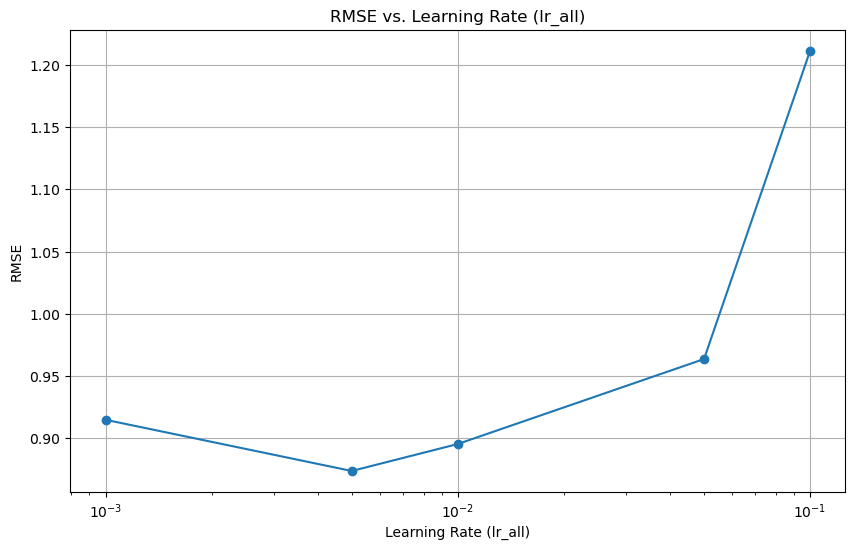

In [ ]:
# Initialize lists to store RMSE and learning rate values
rmse_values = []
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]  # Change the learning rates as needed

# Perform cross-validation for each learning rate
for lr_all in learning_rates:
    svd_model = SVD(lr_all=lr_all)
    results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_values.append(results['test_rmse'].mean())

# Plot RMSE vs. learning rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, rmse_values, marker='o')
plt.title('RMSE vs. Learning Rate (lr_all)')
plt.xlabel('Learning Rate (lr_all)')
plt.ylabel('RMSE')
plt.xscale('log')  # Use a logarithmic scale for the learning rate
plt.grid(True)
plt.show()




In [ ]:
#splitting data into train and test sets
train_split, test_split = train_test_split(df_ratings, test_size = 0.25, random_state = 20)
print("Training data size:", train_split.shape)
print("Test data size:", test_split.shape)

Training data size: (750156, 3)
Test data size: (250053, 3)


In [ ]:
#reader for parsing the ratings file
reader = Reader(rating_scale=(1, 5))
#building the train and test set, loading the data from dataframe 
train_build = Dataset.load_from_df(train_split, reader)
test_build = Dataset.load_from_df(test_split, reader)
trainset = train_build.build_full_trainset()
testset = test_build.build_full_trainset().build_testset() 
print("Test set size:", len(testset))

Test set size: 250053


In [ ]:
#model building
#takes in factors, epochs, learning rate and regularization parameter 
model = SVD(n_factors=20,n_epochs=5,lr_all=0.09,reg_all=0.5) 
model.fit(trainset)

In [ ]:
#making predictions
predictions = model.test(testset)
#calculating rmse
accuracy.rmse(predictions, verbose = True)
#Save all the predicted ratings and convert it to a dataframe 

RMSE: 0.9641


0.9640903394469486

In [ ]:
all_recommendations_list = defaultdict(list)
all_recommendations_df = pd.DataFrame([])
# Create empty lists to collect data for each column
user_list = []
movie_id_list = []
predicted_rating_list = []

for uid, iid, true_r, est, _ in predictions:
    all_recommendations_list[uid].append((iid, est))
    user_list.append(uid)
    movie_id_list.append(iid)
    predicted_rating_list.append(est)


#for uid, iid, true_r, est, _ in predictions:
    #all_recommendations_list[uid].append((iid, est))
    
# Create a DataFrame using the collected data
all_recommendations_df = pd.DataFrame({'user': user_list, 'movie_id': movie_id_list, 'predicted_rating': predicted_rating_list})
    #all_recommendations_df = all_recommendations_df.append(pd.DataFrame({'user': uid, 'movieId': iid, 'predicted_rating' : est}, index=[0]), ignore_index=True); 
print(all_recommendations_df.head(5)) 
print(all_recommendations_df.shape)


   user  movie_id  predicted_rating
0  1490       648          4.001559
1  1490      1527          4.451439
2  1490      2278          3.934695
3  1490      3404          3.882307
4  1490      1752          3.695100
(250053, 3)


In [ ]:
#Merging with movies file to get genre, title information for predictions
all_recommendations_df_details = pd.merge(all_recommendations_df,df_movies, on='movie_id', how='inner') 
print(all_recommendations_df_details.head(5))

   user  movie_id  predicted_rating                       title  \
0  1490       648          4.001559  Mission: Impossible (1996)   
1  4478       648          3.390777  Mission: Impossible (1996)   
2  5643       648          3.108085  Mission: Impossible (1996)   
3  4054       648          3.457194  Mission: Impossible (1996)   
4   134       648          2.998955  Mission: Impossible (1996)   

                     genres  
0  Action|Adventure|Mystery  
1  Action|Adventure|Mystery  
2  Action|Adventure|Mystery  
3  Action|Adventure|Mystery  
4  Action|Adventure|Mystery  


In [ ]:
#List of top n recommendations list as per SVD++
def get_top_n_recommendation_list_df(all_recommendations_df_details, n=10):
    top_n_recommendations_df = all_recommendations_df_details.sort_values(['user','predicted_rating'] ,ascending=[True, False])
    return top_n_recommendations_df


In [ ]:
top_n_recommendations_df = get_top_n_recommendation_list_df(all_recommendations_df_details, 10) 
print(top_n_recommendations_df.head())


        user  movie_id  predicted_rating  \
55722      1       720          4.219994   
238962     1      1545          4.202413   
186764     1       914          4.047111   
15601      1      2692          4.015035   
128703     1       150          3.991830   

                                                    title  \
55722   Wallace & Gromit: The Best of Aardman Animatio...   
238962                                     Ponette (1996)   
186764                                My Fair Lady (1964)   
15601                    Run Lola Run (Lola rennt) (1998)   
128703                                   Apollo 13 (1995)   

                      genres  
55722              Animation  
238962                 Drama  
186764       Musical|Romance  
15601   Action|Crime|Romance  
128703                 Drama  


In [ ]:
metrics=[]
true_positives_array = []
est_array = []
for rating_threshold in np.arange(0,5.5,0.5):
    truePositives = 0
    trueNegatives = 0
    falseNegatives = 0
    falsePositives = 0
    accuracy =0
    precision =0
    recall =0
    f1_score = 0
    for uid,_, true_r, est, _ in predictions:
        if(true_r >= rating_threshold and est >= rating_threshold):
            truePositives = truePositives + 1 
            true_positives_array.append(true_r) 
            est_array.append(est)
#here
        elif(true_r >= rating_threshold and est<= rating_threshold):
            falseNegatives = falseNegatives + 1 
        elif(true_r <= rating_threshold and est >=rating_threshold):
             falsePositives = falsePositives + 1 
        elif(true_r <= rating_threshold and est<=rating_threshold):
            trueNegatives = trueNegatives + 1 
        if(truePositives > 0):
            accuracy = (truePositives + trueNegatives ) / (truePositives + trueNegatives + falsePositives + falseNegatives)
            precision = truePositives / (truePositives + falsePositives)
            recall = truePositives / (truePositives + falseNegatives) 
            f1_score = 2 * (precision * recall) / (precision + recall)


In [ ]:
metrics.append([rating_threshold,truePositives,trueNegatives,falsePositives,falseNegatives,accuracy,precision,recall,f1_score])
metrics_df = pd.DataFrame(metrics)
metrics_df.rename(columns={0:'rating_threshold', 1:'truePositives', 2: 'trueNegatives', 3: 'falsePositives', 4:'falseNegatives', 5: 'Accuracy', 6: 'Precision', 7:'Recall', 8:'F1 Score'},inplace=True)
true_bin_array =[]
for x in true_positives_array:
    if x >= rating_threshold: 
        x=1
    else: 
        x=0
    true_bin_array.append(x)
auc_score =roc_auc_score(true_bin_array,est_array,multi_class='raise',average='macro')
print('AUC Score: ',auc_score)


AUC Score:  0.7320931925100368


In [ ]:
#Calculate precision and recall at n
def get_precision_recall_at_n(predictions,topn,rating_threshold): 
    all_actual_predicted_list = defaultdict(list)
    precision = dict()
    recall= dict()
    no_of_relevant_items = 0 
    no_of_recommended_items_at_top_n = 0 
    no_of_relevant_recommended_items_at_top_n = 0  
    for uid, iid, true_r, est, _ in predictions:
        all_actual_predicted_list[uid].append((est, true_r)) 
    for uid, user_ratings in all_actual_predicted_list.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        no_of_relevant_items = sum((true_r >= rating_threshold) for (_, true_r) in user_ratings)
        no_of_recommended_items_at_top_n = sum((est >= rating_threshold) for (est, _) in user_ratings[:topn])
        no_of_relevant_recommended_items_at_top_n = sum(((true_r >= rating_threshold) and (est >= rating_threshold)) for (est, true_r) in user_ratings[:topn])
        precision[uid] = no_of_relevant_recommended_items_at_top_n / no_of_recommended_items_at_top_n if no_of_recommended_items_at_top_n != 0 else 1
        recall[uid] = no_of_relevant_recommended_items_at_top_n / no_of_relevant_items if no_of_relevant_items != 0 else 1
    return precision, recall 

rating_threshold=3 
precision_recall_at_n = [] 
for topn in range(2,20):
    precision, recall = get_precision_recall_at_n(predictions,topn,rating_threshold)
    precision_at_n = sum(prec for prec in precision.values()) / len(precision)

    recall_at_n = sum(rec for rec in recall.values()) / len(recall)
    precision_recall_at_n.append({'topN' : topn, 'Precision' : precision_at_n, 'Recall': recall_at_n})
for n in range(3,9):
    print(precision_recall_at_n[n])
#get user high rated and liked movies
all_movie_df_details = pd.merge(df_ratings,df_movies, on='movie_id', how='inner')
all_movie_df_details = all_movie_df_details.sort_values(['user_id','rating'],ascending=[True, False])
print(all_movie_df_details.loc[all_movie_df_details['user_id'] == 10].head(10)) #user 10 top 10 rated movies
#user 10 top 10 movie recommendations list 
print(top_n_recommendations_df.loc[top_n_recommendations_df['user'] == 10].head(10))

{'topN': 5, 'Precision': 0.9358692052980356, 'Recall': 0.3256162814229165}
{'topN': 6, 'Precision': 0.932784216335538, 'Recall': 0.37363168470378766}
{'topN': 7, 'Precision': 0.9304347997477102, 'Recall': 0.4155271779874058}
{'topN': 8, 'Precision': 0.9274310154525397, 'Recall': 0.4520480343468461}
{'topN': 9, 'Precision': 0.9251476269315432, 'Recall': 0.48475798180697266}
{'topN': 10, 'Precision': 0.9226531456953639, 'Recall': 0.5134083550618816}
       user_id  movie_id  rating                                   title  \
2252        10       914       5                     My Fair Lady (1964)   
5906        10      1197       5              Princess Bride, The (1987)   
8927        10      2804       5               Christmas Story, A (1983)   
10279       10       594       5  Snow White and the Seven Dwarfs (1937)   
11043       10       919       5                Wizard of Oz, The (1939)   
12761       10       595       5             Beauty and the Beast (1991)   
14007       10  